<a href="https://colab.research.google.com/github/samp3209/capstone/blob/main/MassPromptGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import pandas as pd
import torch


In [19]:
#import google drive for output storage
from google.colab import drive
import os
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
#Download requirements
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 12.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.1 MB/s eta 0:00:00


In [3]:
#Setup Pipeline with model version
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [14]:
#Import dataset 
df = pd.read_csv('chaunceyprompts - test (1).csv')

In [4]:
#test image
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
#Run through every prompt and store output PIL image to list
images = []
for prompt in df['prompt']:
  image = pipe(prompt).images[0]
  images.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

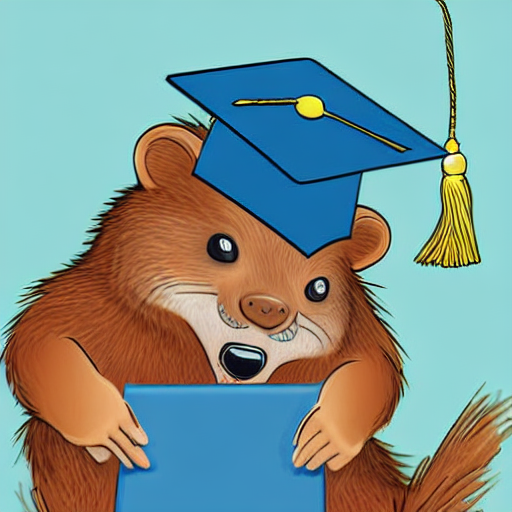

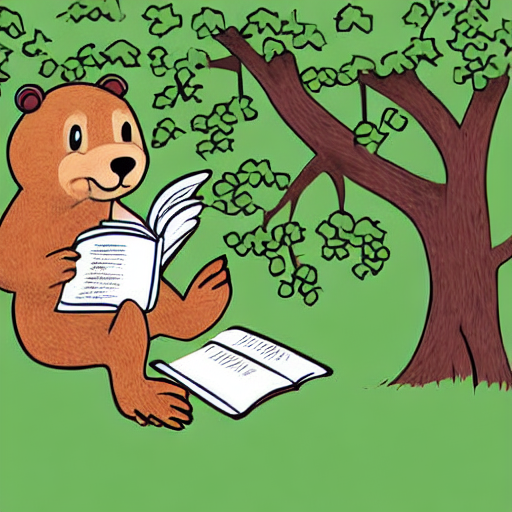

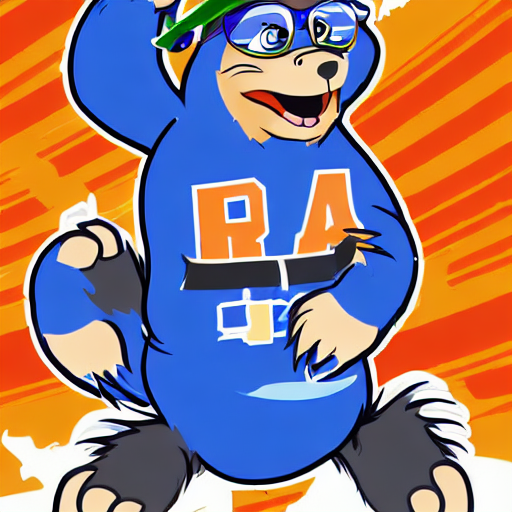

In [18]:
#Display images 
#for image in images:
  #display(image)

In [22]:
#Create output path if doesn't exist. Change /Test/ to desired folder name
import os.path
from os import path
path = "/content/gdrive/MyDrive/MassOutput/Test/"
isExist = os.path.exists(path)
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs(path)

In [24]:
#Goes through each PIL Image and stores it to a png.
for image in images: 
  image.save(f"{path}{image}.png")